In [13]:
import heapq

In [14]:
def dfs(graph, start, goal):
    stack = [start]
    visited = set()

    while stack:
        print("Current stack:", stack)

        node = stack.pop()  
        print(f"expand node: {node}")

        if node == goal:
            print(f"Goal {goal} found!")
            return True

        if node not in visited:
            visited.add(node)
            # Add children in alphabetical order
            for child in sorted(graph[node], reverse=False):
                    print(f"push child: {child}")
                    stack.append(child)

    print(f"Goal {goal} not found.")

    return False

graph = {
    'Start': ['A', 'B', 'C'],
    'A': ['E'],
    'B': ['D', 'G'],
    'C': ['G'],
    'D': ['G', 'C'],
    'E': ['C', 'G'],
    'G': []
}

dfs(graph, 'Start', 'G')

Current stack: ['Start']
expand node: Start
push child: A
push child: B
push child: C
Current stack: ['A', 'B', 'C']
expand node: C
push child: G
Current stack: ['A', 'B', 'G']
expand node: G
Goal G found!


True

In [24]:
graph = {
    'Start': [('A', 6), ('B', 4), ('C', 13)],
    'A': [('E', 4)],
    'B': [('D', 8), ('G', 11)],
    'C': [('G', 3)],
    'D': [('G', 7), ('C', 5)],
    'E': [('C', 3), ('G', 8)],
    'G': []
}

heuristics = {
    'Start': 14,
    'A': 11,
    'B': 10,
    'C': 3,
    'D': 2,
    'E': 3,
    'G': 0
}




# Uniform Cost Search function
def uniform_cost_search(start, goal):
    frontier = []
    # Push the starting node with path cost 0
    heapq.heappush(frontier, (0, start))
    explored = set()

    while frontier:
         # the node with the smallest cost is popped
        cost, node = heapq.heappop(frontier) 
        print(f"expand node: {node}, cost: {cost}")
        if node == goal:
            return cost
        
        if node not in explored:
            explored.add(node)
            for neighbor, edge_cost in graph.get(node, []):
                if neighbor not in explored:
                    heapq.heappush(frontier, (cost + edge_cost, neighbor))
        
        print("Frontier:", [(n, c) for c, n in frontier])

    return float('inf')  

# Example usage
uniform_cost_search('Start', 'G')



expand node: Start, cost: 0
Frontier: [('B', 4), ('A', 6), ('C', 13)]
expand node: B, cost: 4
Frontier: [('A', 6), ('C', 13), ('D', 12), ('G', 15)]
expand node: A, cost: 6
Frontier: [('E', 10), ('D', 12), ('G', 15), ('C', 13)]
expand node: E, cost: 10
Frontier: [('D', 12), ('C', 13), ('G', 15), ('C', 13), ('G', 18)]
expand node: D, cost: 12
Frontier: [('C', 13), ('C', 13), ('G', 15), ('G', 18), ('G', 19), ('C', 17)]
expand node: C, cost: 13
Frontier: [('C', 13), ('C', 17), ('G', 15), ('G', 18), ('G', 19), ('G', 16)]
expand node: C, cost: 13
Frontier: [('G', 15), ('C', 17), ('G', 16), ('G', 18), ('G', 19)]
expand node: G, cost: 15


15

In [25]:
import heapq

graph = {
    'Start': [('A', 6), ('B', 4), ('C', 13)],
    'A': [('E', 4)],
    'B': [('D', 8), ('G', 11)],
    'C': [('G', 3)],
    'D': [('G', 7), ('C', 5)],
    'E': [('C', 3), ('G', 8)],
    'G': []
}
heuristics = {
    'Start': 14,
    'A': 11,
    'B': 10,
    'C': 3,
    'D': 2,
    'E': 3,
    'G': 0
}

def greedy_best_first_search(start, goal):
    frontier = []

    # Push the starting node with its heuristic value
    heapq.heappush(frontier, (heuristics[start], start))  
    explored = set()
    parent_map = {start: None}  #reconstruct the path

    while frontier:
        # the node with the smallest heuristic value is popped
        h_value, node = heapq.heappop(frontier)
        print(f"expand node: {node}, heuristic value: {h_value}")
        if node == goal:
            return reconstruct_path(parent_map, start, goal)
        
        if node not in explored:
            explored.add(node)
            for neighbor, _ in graph.get(node, []):
                if neighbor not in explored:
                    heapq.heappush(frontier, (heuristics[neighbor], neighbor))
                    parent_map[neighbor] = node
        
        # Print the current state of the frontier
        print("Frontier:", [(n, h) for h, n in frontier])

    return None 

def reconstruct_path(parent_map, start, goal):
    path = []
    node = goal
    while node is not None:
        path.append(node)
        node = parent_map[node]
    path.reverse()
    return path

# Example usage
path = greedy_best_first_search('Start', 'G')
print("Path:", path)

expand node: Start, heuristic value: 14
Frontier: [('C', 3), ('A', 11), ('B', 10)]
expand node: C, heuristic value: 3
Frontier: [('G', 0), ('A', 11), ('B', 10)]
expand node: G, heuristic value: 0
Path: ['Start', 'C', 'G']


In [26]:
import heapq

graph = {
    'Start': [('A', 6), ('B', 4), ('C', 13)],
    'A': [('E', 4)],
    'B': [('D', 8), ('G', 11)],
    'C': [('G', 3)],
    'D': [('G', 7), ('C', 5)],
    'E': [('C', 3), ('G', 8)],
    'G': []
}

heuristics = {
    'Start': 14,
    'A': 11,
    'B': 10,
    'C': 3,
    'D': 2,
    'E': 3,
    'G': 0
}

# A* Search function
def a_star_search(start, goal):
    frontier = []
    # Push the starting node with its heuristic value
    heapq.heappush(frontier, (heuristics[start], start)) 
    explored = set()
    parent_map = {start: None}  # To reconstruct the path
    g_costs = {start: 0} # Cost tracked from start


    while frontier:
        f_value, node = heapq.heappop(frontier)  # Pop the node with the smallest f value
        print(f"expand node: {node}, f value: {f_value}")
        if node == goal:
            return reconstruct_path(parent_map, start, goal)
        
        if node not in explored:
            explored.add(node)
            for neighbor, cost in graph.get(node, []):
                new_g_cost = g_costs[node] + cost
                if neighbor not in explored or new_g_cost < g_costs.get(neighbor, float('inf')):
                    g_costs[neighbor] = new_g_cost
                    f_value = new_g_cost + heuristics[neighbor]
                    heapq.heappush(frontier, (f_value, neighbor))
                    parent_map[neighbor] = node
        
        # Print the current state of the frontier
        print("Frontier:", [(n, f) for f, n in frontier])

    return None  # If goal is not reachable

def reconstruct_path(parent_map, start, goal):
    path = []
    node = goal
    while node is not None:
        path.append(node)
        node = parent_map[node]
    path.reverse()
    return path

# Example usage
path = a_star_search('Start', 'G')
print("Path:", path)

expand node: Start, f value: 14
Frontier: [('B', 14), ('A', 17), ('C', 16)]
expand node: B, f value: 14
Frontier: [('D', 14), ('G', 15), ('C', 16), ('A', 17)]
expand node: D, f value: 14
Frontier: [('G', 15), ('A', 17), ('C', 16), ('G', 19), ('C', 20)]
expand node: G, f value: 15
Path: ['Start', 'B', 'D', 'G']


In [35]:
import heapq

graph = {
    'A': [('B', 120), ('D', 90), ('C', 54)],
    'B': [('A', 120), ('D', 95), ('E', 76)],
    'C': [('A', 54), ('D', 64)],
    'D': [('A', 90), ('C', 64), ('B', 95), ('E', 55)],
    'E': [('D', 55), ('B', 76)]
}

def minimize_max_edge_cost(start, goal):
    frontier = []
    heapq.heappush(frontier, (0, start))  # Push the starting node with max edge cost 0
    explored = set()
    parent_map = {start: None}  # To reconstruct the path
    max_edge_cost_map = {start: 0}  # To keep track of the max edge cost to each node

    while frontier:
        max_edge_cost, node = heapq.heappop(frontier)  # Pop the node with the smallest max edge cost
        print(f"expand node: {node}, max edge cost: {max_edge_cost}")
        if node == goal:
            return reconstruct_path(parent_map, start, goal), max_edge_cost
        
        if node not in explored:
            explored.add(node)
            for neighbor, edge_cost in graph.get(node, []):
                new_max_edge_cost = max(max_edge_cost, edge_cost)
                if neighbor not in explored or new_max_edge_cost < max_edge_cost_map.get(neighbor, float('inf')):
                    heapq.heappush(frontier, (new_max_edge_cost, neighbor))
                    parent_map[neighbor] = node
                    max_edge_cost_map[neighbor] = new_max_edge_cost
        
        # Print the current state of the frontier
        print("Frontier:", [(n, c) for c, n in frontier])

    return None, float('inf')  # If goal is not reachable

def reconstruct_path(parent_map, start, goal):
    path = []
    node = goal
    while node is not None:
        path.append(node)
        node = parent_map[node]
    path.reverse()
    return path

# Example usage
path, max_edge_cost = minimize_max_edge_cost('A', 'B')
print("Path:", path)
print("Maximum edge cost on path:", max_edge_cost)

expand node: A, max edge cost: 0
Frontier: [('C', 54), ('B', 120), ('D', 90)]
expand node: C, max edge cost: 54
Frontier: [('D', 64), ('B', 120), ('D', 90)]
expand node: D, max edge cost: 64
Frontier: [('E', 64), ('D', 90), ('B', 95), ('B', 120)]
expand node: E, max edge cost: 64
Frontier: [('B', 76), ('D', 90), ('B', 95), ('B', 120)]
expand node: B, max edge cost: 76
Path: ['A', 'C', 'D', 'E', 'B']
Maximum edge cost on path: 76


In [36]:
import heapq

graph = {
    'A': [('B', 120), ('D', 90), ('C', 54)],
    'B': [('A', 120), ('D', 95), ('E', 76)],
    'C': [('A', 54), ('D', 64)],
    'D': [('A', 90), ('C', 64), ('B', 95), ('E', 55)],
    'E': [('D', 55), ('B', 76)]
}

def minimize_max_edge_cost(start, goal):
    frontier = []
    heapq.heappush(frontier, (0, start, 0))  # Push the starting node with max edge cost 0
    explored = set()
    parent_map = {start: None}  # To reconstruct the path
    max_edge_cost_map = {start: 0}  # To keep track of the max edge cost to each node

    while frontier:
        max_edge_cost, node, path_cost = heapq.heappop(frontier)  # Pop the node with the smallest max edge cost
        print(f"expand node: {node}, max edge cost: {max_edge_cost}, path cost: {path_cost}")
        if node == goal:
            return reconstruct_path(parent_map, start, goal), max_edge_cost
        
        if node not in explored:
            explored.add(node)
            for neighbor, edge_cost in graph.get(node, []):
                new_max_edge_cost = max(max_edge_cost, edge_cost)
                new_path_cost = path_cost + edge_cost
                if neighbor not in explored or new_max_edge_cost < max_edge_cost_map.get(neighbor, float('inf')):
                    heapq.heappush(frontier, (new_max_edge_cost, neighbor, new_path_cost))
                    parent_map[neighbor] = node
                    max_edge_cost_map[neighbor] = new_max_edge_cost
        
        # Print the current state of the frontier
        print("Frontier:", [(n, c, p) for c, n, p in frontier])

    return None, float('inf')  # If goal is not reachable

def reconstruct_path(parent_map, start, goal):
    path = []
    node = goal
    while node is not None:
        path.append(node)
        node = parent_map[node]
    path.reverse()
    return path

# Example usage
path, max_edge_cost = minimize_max_edge_cost('A', 'B')
print("Path:", path)
print("Maximum edge cost on path:", max_edge_cost)

expand node: A, max edge cost: 0, path cost: 0
Frontier: [('C', 54, 54), ('B', 120, 120), ('D', 90, 90)]
expand node: C, max edge cost: 54, path cost: 54
Frontier: [('D', 64, 118), ('B', 120, 120), ('D', 90, 90)]
expand node: D, max edge cost: 64, path cost: 118
Frontier: [('E', 64, 173), ('D', 90, 90), ('B', 95, 213), ('B', 120, 120)]
expand node: E, max edge cost: 64, path cost: 173
Frontier: [('B', 76, 249), ('D', 90, 90), ('B', 95, 213), ('B', 120, 120)]
expand node: B, max edge cost: 76, path cost: 249
Path: ['A', 'C', 'D', 'E', 'B']
Maximum edge cost on path: 76


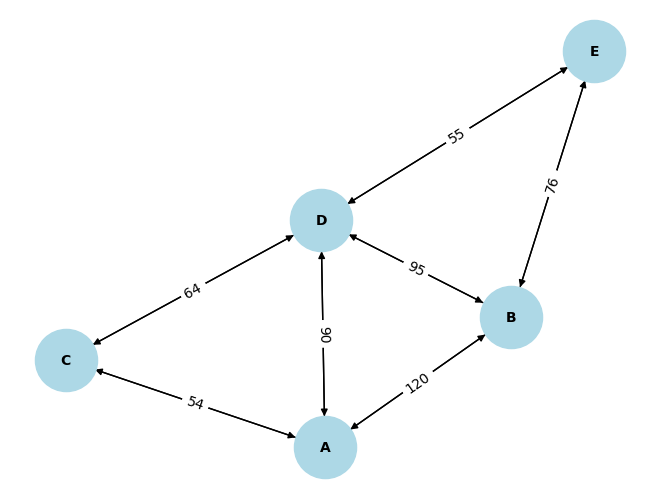

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

graph = {
    'A': [('B', 120), ('D', 90), ('C', 54)],
    'B': [('A', 120), ('D', 95), ('E', 76)],
    'C': [('A', 54), ('D', 64)],
    'D': [('A', 90), ('C', 64), ('B', 95), ('E', 55)],
    'E': [('D', 55), ('B', 76)]
}

G = nx.DiGraph()

for node, edges in graph.items():
    for neighbor, weight in edges:
        G.add_edge(node, neighbor, weight=weight)


edge_labels = {}
for u, v, d in G.edges(data=True):
    edge_labels[(u, v)] = d['weight']


# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()